<a href="https://colab.research.google.com/github/Esiowu/alx-low_level_programming/blob/master/PAA_UFE_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and Upload dataset**



In [1]:
from sklearn.cluster import KMeans
import numpy as np


# Upload CSV File:

In [2]:
import pandas as pd
# importing dataset locally
from google.colab import files
uploaded = files.upload()

Saving Calgary_Prince_Ugochukwu.csv to Calgary_Prince_Ugochukwu (1).csv


In [3]:
# Read the CSV file and display the first five columns
vending_machine_points_df = pd.read_csv('Calgary_Prince_Ugochukwu.csv')
print(vending_machine_points_df.head())

         @id       @lat        @lon
0  740336257  51.043497 -114.071911
1  740336260  51.043757 -114.076029
2  740336263  51.042671 -114.071144
3  740336265  51.043465 -114.070644
4  740336267  51.043426 -114.069166


**KMeans Spatial Clustering**

In [4]:
data = vending_machine_points_df[['@lat', '@lon']] # identifying the columns of reference
num_clusters = 5 # Using 5 cluster centers
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
kmeans.fit(data)
vending_machine_points_df['cluster_label'] = kmeans.labels_

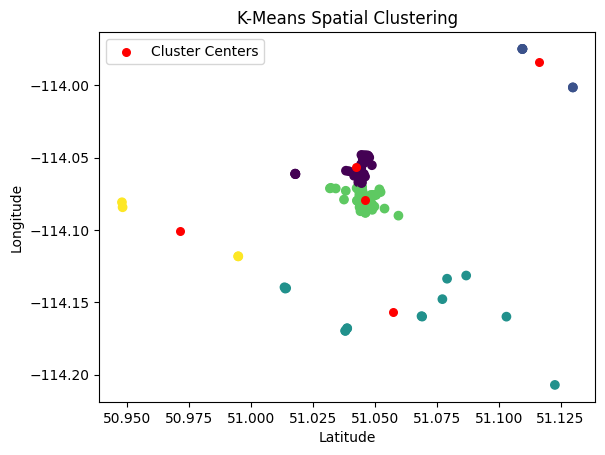

Cluster Centers:
[[  51.04235219 -114.05623058]
 [  51.11636032 -113.98381375]
 [  51.05733144 -114.15685356]
 [  51.04590545 -114.07940463]
 [  50.97148403 -114.10045378]]


In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['@lat'], data['@lon'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label='Cluster Centers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Spatial Clustering')
plt.legend()
plt.show()

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display cluster centroids on interactive map (Optional):

In [6]:
import folium
m = folium.Map(location=[data['@lat'].mean(), data['@lon'].mean()],zoom_start=6,width='50%', height='50%')

for i, center in enumerate(kmeans.cluster_centers_):
    folium.Marker(location=center, icon=folium.Icon(icon='cloud', prefix='fa', color='blue')).add_to(m)
m

# Experiment with different parameter values:

<function matplotlib.pyplot.show(close=None, block=None)>

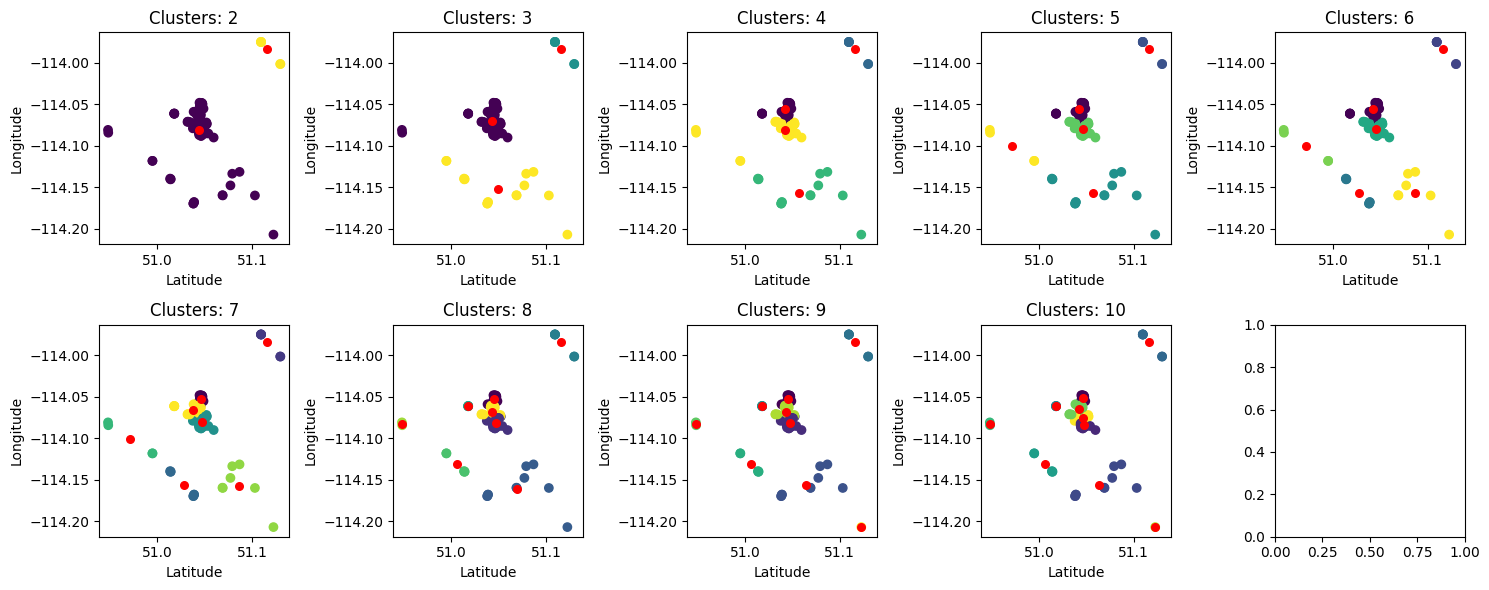

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

#Loop through clusters from 2 to 10
for num_clusters in range(2, 11):

  kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
  kmeans.fit(data)
  vending_machine_points_df['cluster_label'] = kmeans.labels_

  #set row and col for plotting
  row = (num_clusters - 2) // 5
  col = (num_clusters - 2) % 5

  ax = axes[row, col]
  ax.scatter(data['@lat'], data['@lon'], c=kmeans.labels_)
  ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label='Cluster centers')
  ax.set_xlabel('Latitude')
  ax.set_ylabel('Longitude')
  ax.set_title(f'Clusters: {num_clusters}')


plt.tight_layout()
plt.show


#Find optimal number of clusters (optional)
**Silhouette analysis**




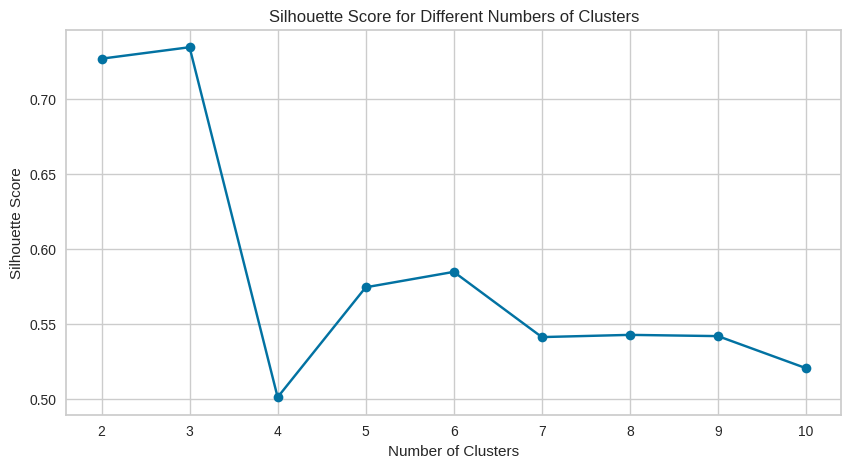

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

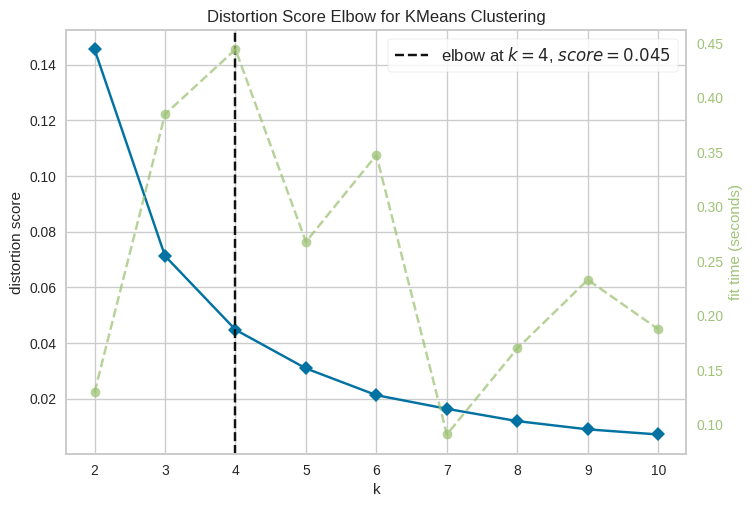

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:

#-----------------------------------------------------------

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

silhouette_scores = []

# Create a range of numbers of clusters
cluster_range = range(2, 11)

# Loop through different numbers of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto")
    kmeans.fit(data)
    labels = kmeans.labels_

    # Calculate the silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Use the elbow method to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=range(2, 11))
visualizer.fit(data)
visualizer.show()


# Cluster Using DBSCAN:

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.006, min_samples=2)
dbscan.fit(data)
labels = dbscan.labels_

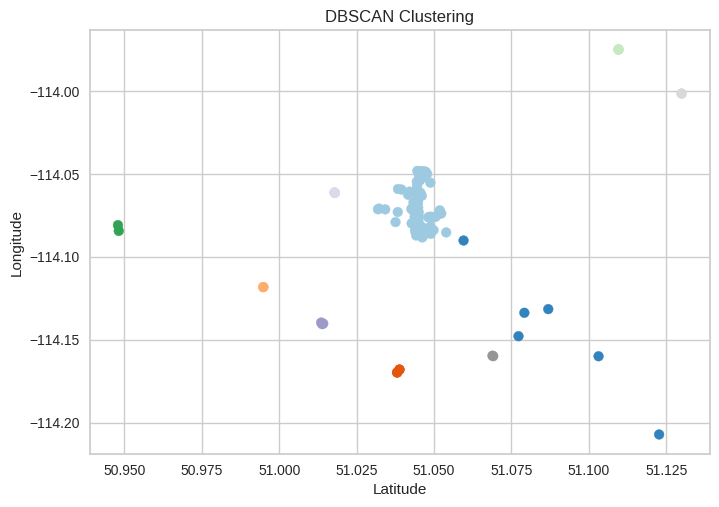

Number of clusters: 9
Number of noise points: 6


In [10]:
plt.scatter(data['@lat'], data['@lon'], c=labels, cmap='tab20c')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
# Count the number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count the number of noise points (points labeled as -1)
num_noise_points = list(labels).count(-1)

print("Number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)

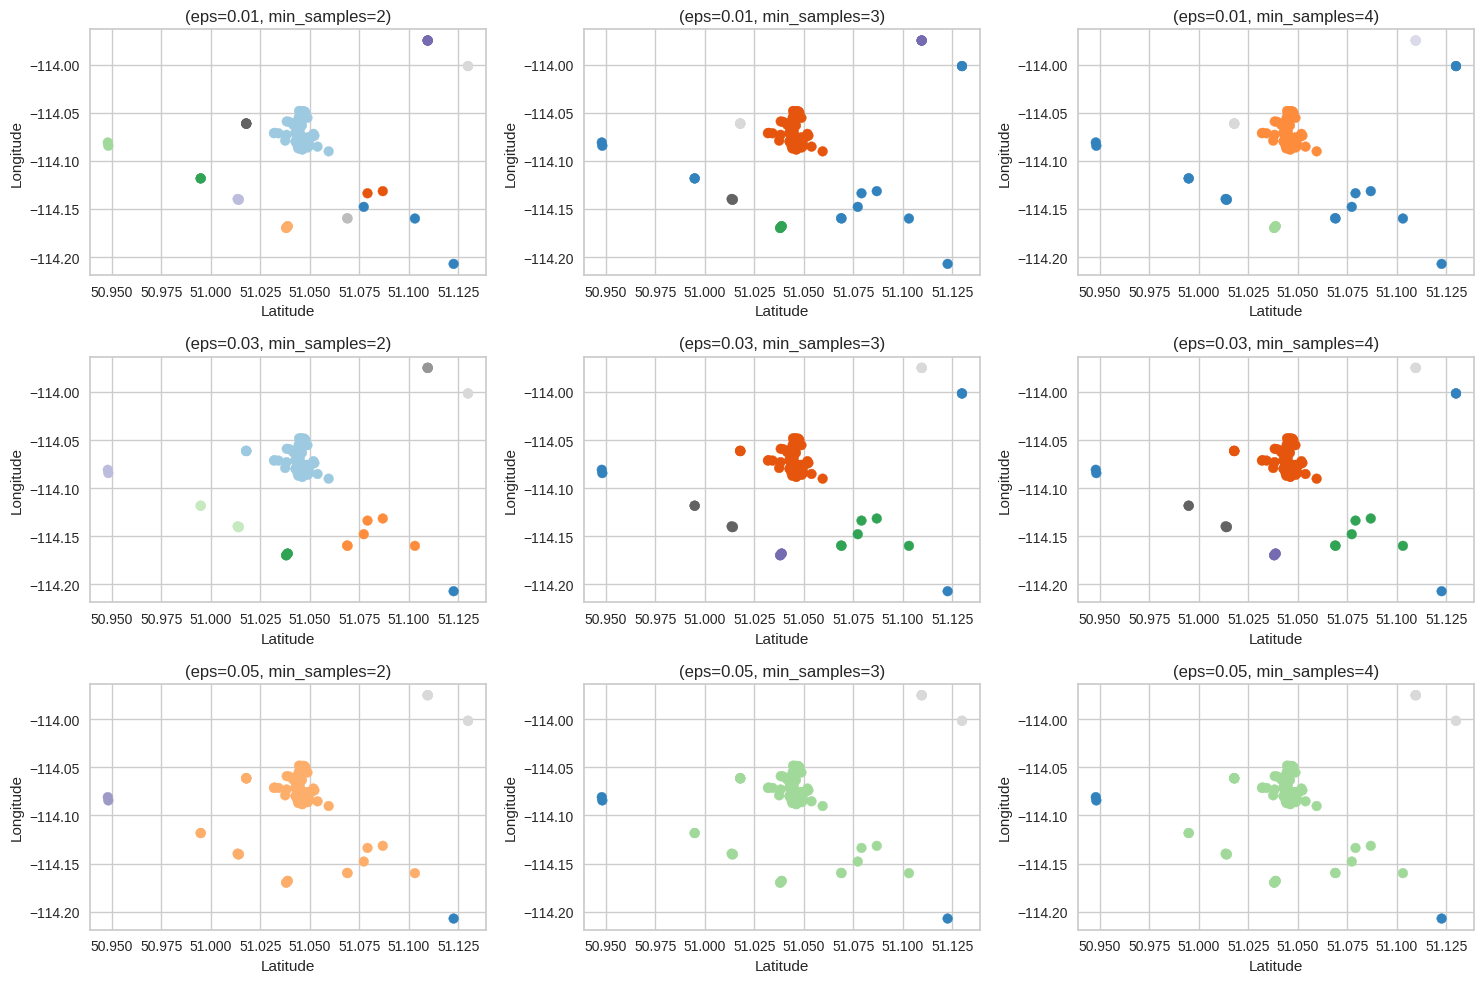

In [11]:
data = vending_machine_points_df[['@lat', '@lon']]

eps_values = np.linspace(0.010, 0.05, 3)
min_samples_values = range(2, 5)

# Create subplots for different combinations of eps and min_samples
num_subplots = len(eps_values) * len(min_samples_values)
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 10))

# Iterate through different combinations of eps and min_samples and plot the results
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_

        # Plot the results in the (i, j)-th subplot
        ax = axs[i, j]
        ax.scatter(data['@lat'], data['@lon'], c=labels, cmap='tab20c')
        ax.set_xlabel('Latitude')
        ax.set_ylabel('Longitude')
        ax.set_title(f'(eps={eps}, min_samples={min_samples})')

plt.tight_layout()
plt.show()

#Find optimal number of clusters:

Optimal arrangement:
Eps Value: 0.01888888888888889
Min Samples: 2
Silhouette Score: 0.7636574926223219


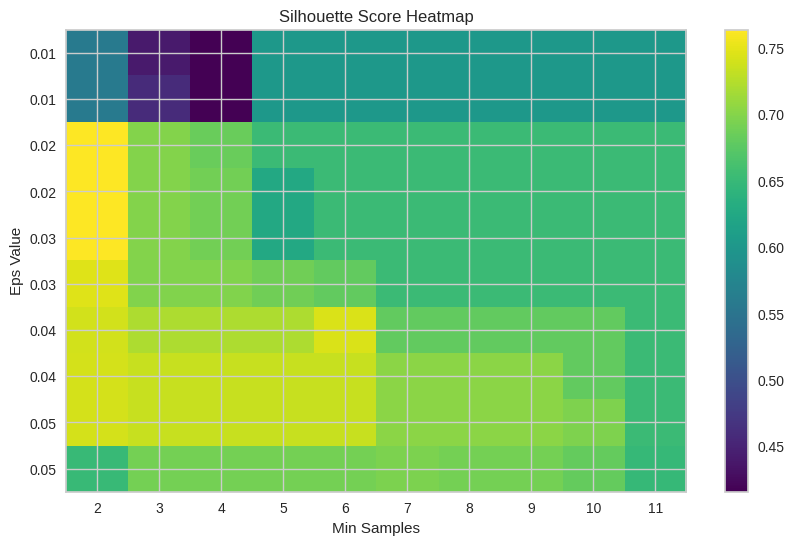

In [12]:
eps_values = np.linspace(0.010, 0.05, 10)
min_samples_values = range(2, 12)

# variables to track optimal parameters
best_silhouette_score = -1
best_eps = None
best_min_samples = None
silhouette_scores = np.empty((len(eps_values), len(min_samples_values)))

#loop over the parameter combinations
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_

        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            silhouette_avg = silhouette_score(data, labels)
            silhouette_scores[i, j] = silhouette_avg

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
        else:
            silhouette_scores[i, j] = None

print("Optimal arrangement:")
print("Eps Value:", best_eps)
print("Min Samples:", best_min_samples)
print("Silhouette Score:", best_silhouette_score)

# Create a heatmap plot
plt.figure(figsize=(10, 6))
plt.imshow(silhouette_scores, interpolation='nearest', cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(min_samples_values)), min_samples_values)
plt.yticks(np.arange(len(eps_values)), ['%.2f' % eps for eps in eps_values])
plt.xlabel('Min Samples')
plt.ylabel('Eps Value')
plt.title('Silhouette Score Heatmap')
plt.show()

THE END : THANK YOU
